# 1. Install and Import Dependencies

In [1]:
!pip install pycaret==2.3.6 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.5/301.5 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.1/167.1 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.9/25.9 MB 36.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 56.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.2/24.2 MB 46.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 74.3 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 11.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 72.6 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 636.6/636.6 kB 37.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 57.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 51.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
!pip install pandas

ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: '/opt/conda/lib/python3.7/site-packages/numpy-1.21.6.dist-info/METADATA'



In [3]:
!pip install shap

ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: '/opt/conda/lib/python3.7/site-packages/numpy-1.21.6.dist-info/METADATA'



In [4]:
!pip install --pre pycaret

  Using cached numpy-1.19.5-cp37-cp37m-manylinux2010_x86_64.whl (14.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
ERROR: Cannot uninstall numpy 1.21.6, RECORD file not found. You might be able to recover from this via: 'pip install --force-reinstall --no-deps numpy==1.21.6'.


In [5]:
import pandas as pd
from pycaret.classification import *

# impots 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools

import seaborn as sns
%matplotlib inline

# 2. Load Data

In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/dhanno03/6220-final-report/main/heart.csv')

In [7]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [9]:
#!pip install pycaret==2.3.6
#! pip subprocess to install build dependencies

In [10]:
#For Google Colab only
#from pycaret.utils import enable_colab 
#enable_colab()

In [11]:
healthy = df[(df['output'] ==0) ].count()[1]
sick = df[(df['output'] ==1) ].count()[1]
print ("num of pepole without heart deacise: "+ str(healthy))
print ("num of pepole with chance for heart deacise: "+ str(sick))

num of pepole without heart deacise: 138
num of pepole with chance for heart deacise: 165


#3. Plots

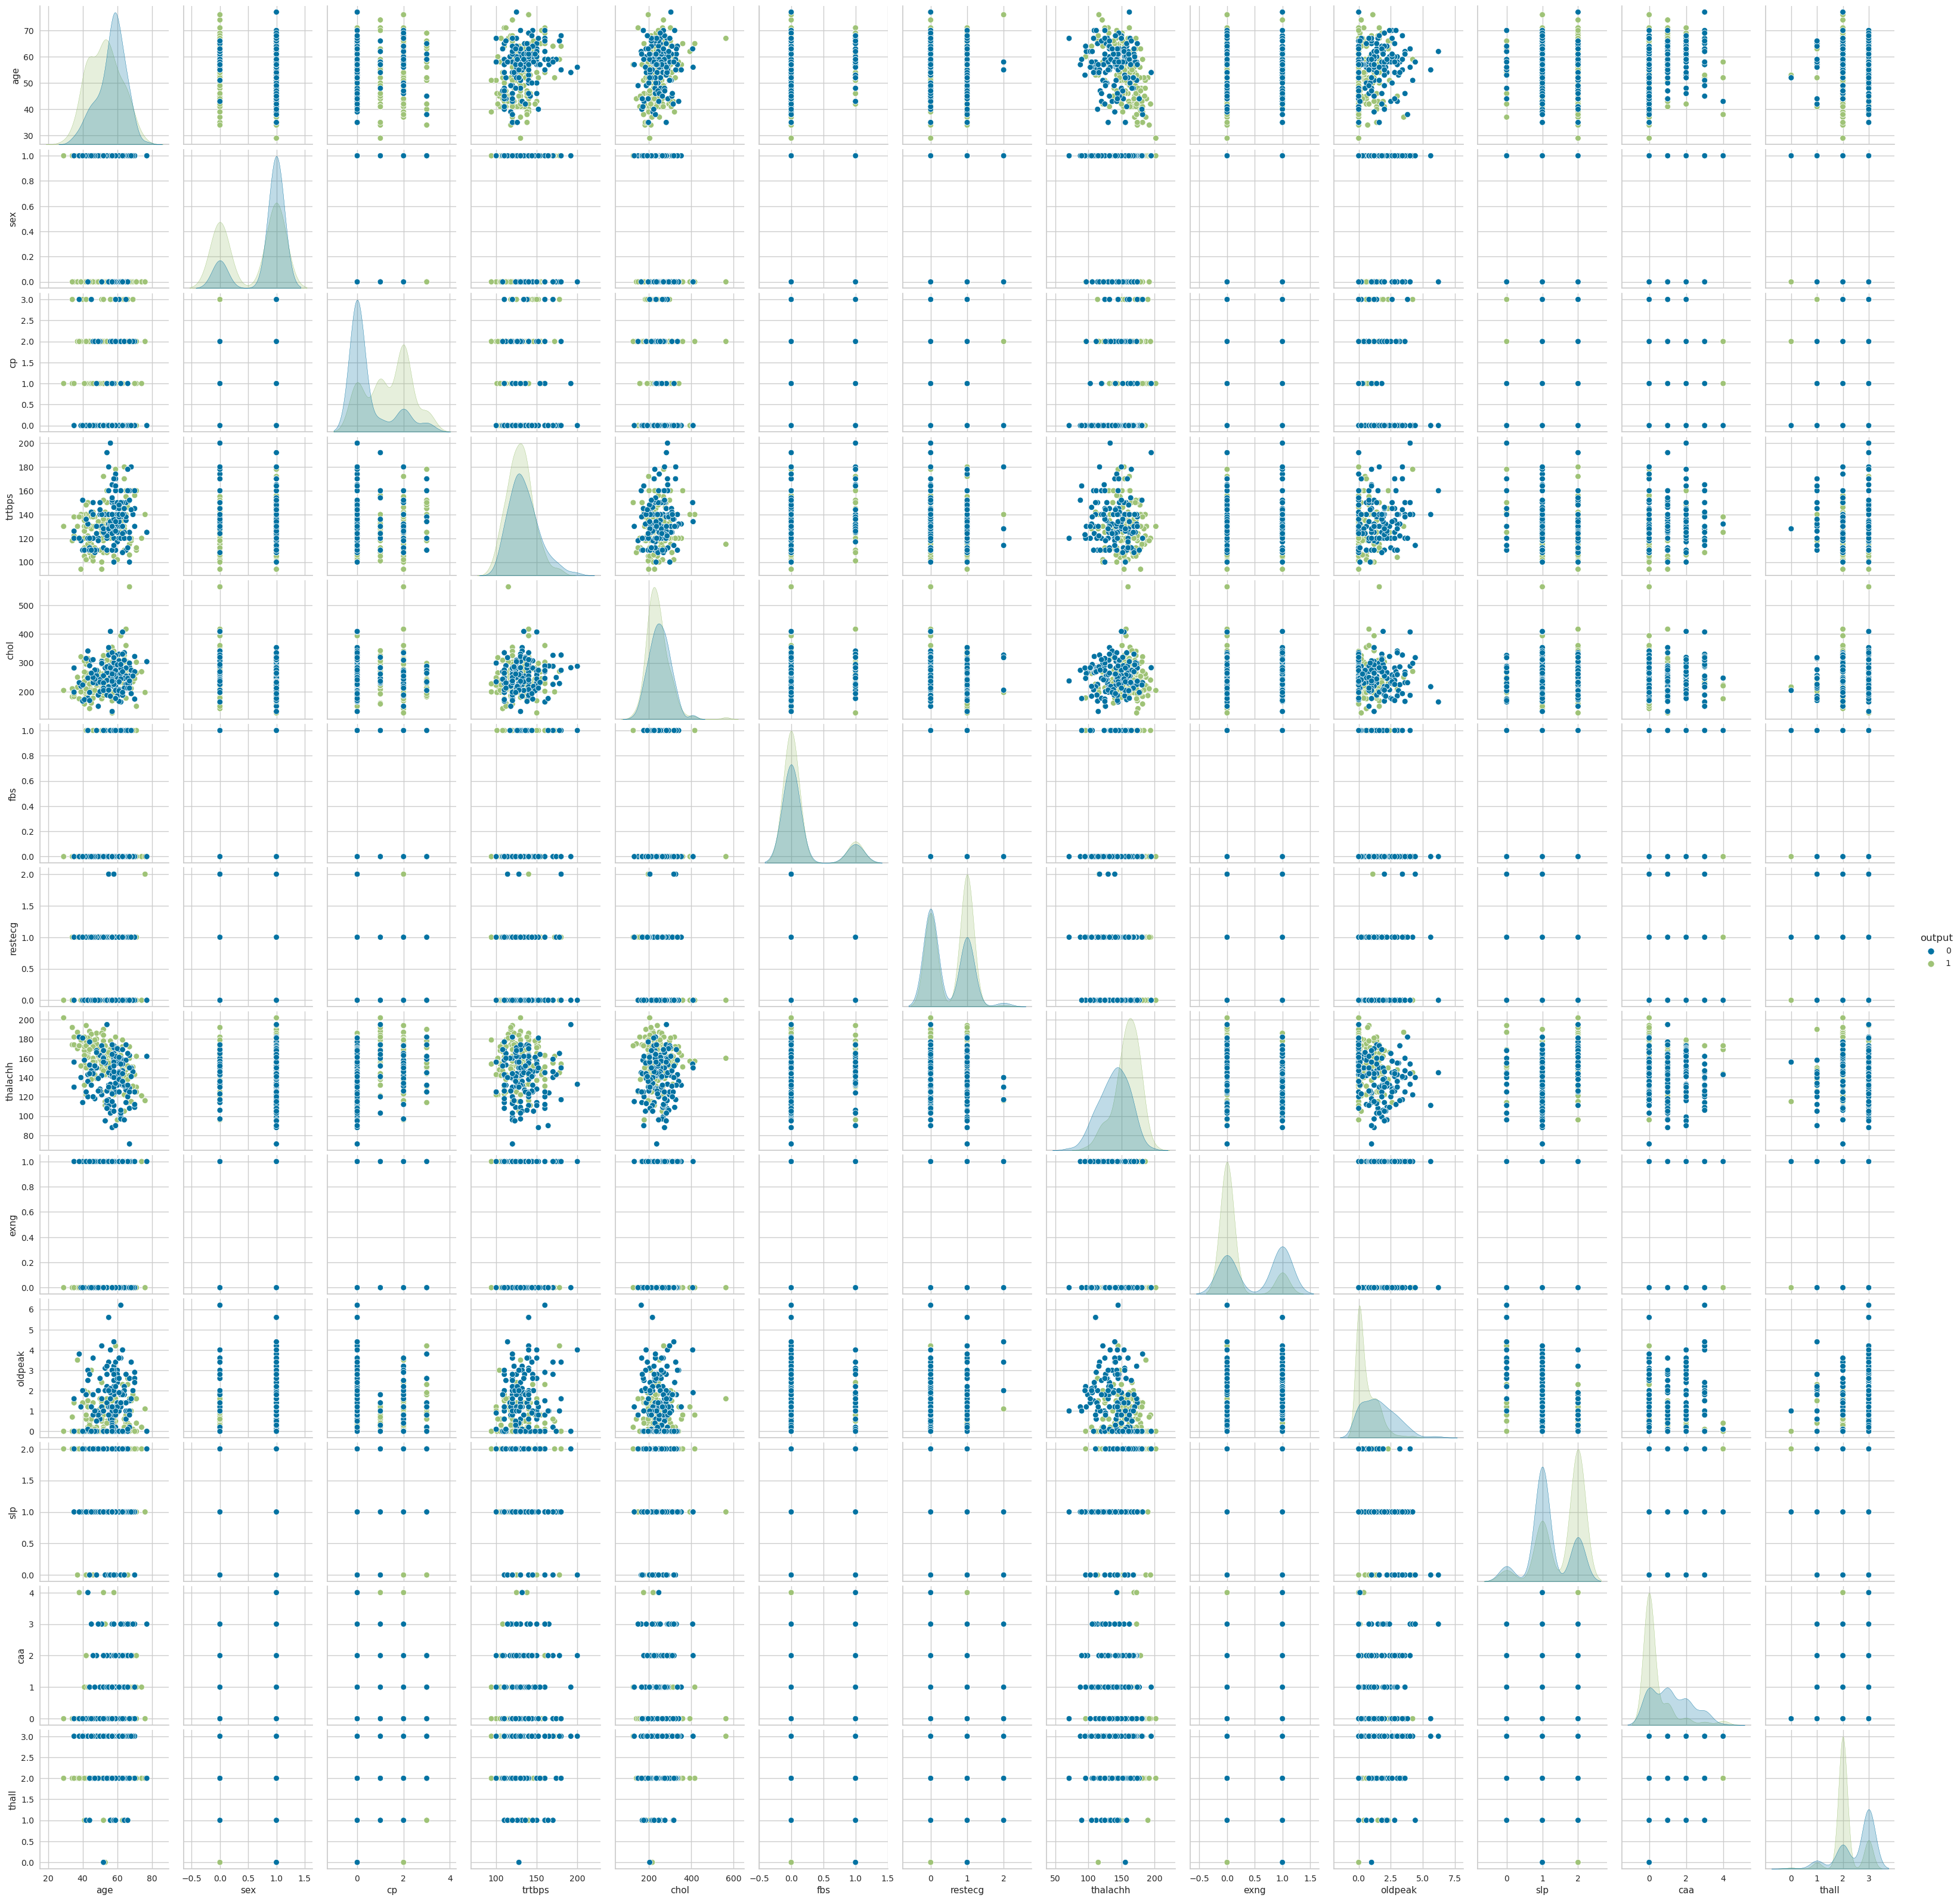

In [12]:
sns.pairplot(df,hue="output")
plt.show()

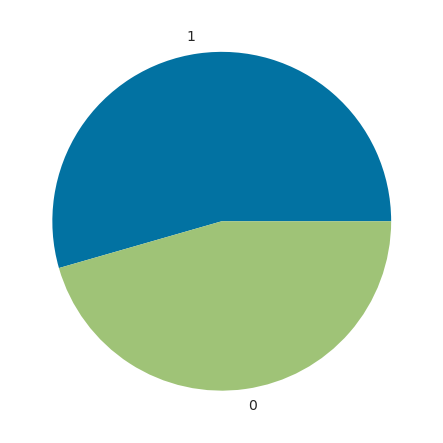

In [13]:
y=df['output']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()


In [14]:
X = df.drop(columns=['output'])
X.head(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2


<AxesSubplot:>

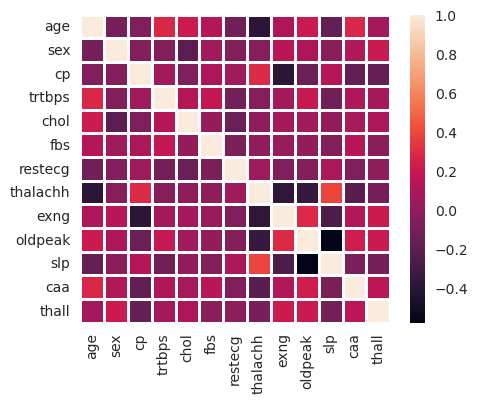

In [15]:
# # calculate the correlation matrix
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
dfNorm = pd.DataFrame(X_std, index=df.index, columns=df.columns[0:13])
corr = dfNorm.corr()

# plot the heatmap
fig = plt.figure(figsize=(5,4))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
            linewidths=.75)

# 3. Train and Evaluate Model

In [16]:
cat_features = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'thalachh']

In [17]:
setup??

Signature:
setup(
    data: pandas.core.frame.DataFrame,
    target: str,
    train_size: float = 0.7,
    test_data: Union[pandas.core.frame.DataFrame, NoneType] = None,
    preprocess: bool = True,
    imputation_type: str = 'simple',
    iterative_imputation_iters: int = 5,
    categorical_features: Union[List[str], NoneType] = None,
    categorical_imputation: str = 'constant',
    categorical_iterative_imputer: Union[str, Any] = 'lightgbm',
    ordinal_features: Union[Dict[str, list], NoneType] = None,
    high_cardinality_features: Union[List[str], NoneType] = None,
    high_cardinality_method: str = 'frequency',
    numeric_features: Union[List[str], NoneType] = None,
    numeric_imputation: str = 'mean',
    numeric_iterative_imputer: Union[str, Any] = 'lightgbm',
    date_features: Union[List[str], NoneType] = None,
    ignore_features: Union[List[str], NoneType] = None,
    normalize: bool = False,
    normalize_method: str = 'zscore',
    transformation: bool = False,
    tr

In [18]:
experiment = setup(df, target='output', categorical_features=cat_features)

,Description,Value
0,session_id,6253
1,Target,output
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(303, 14)"
5,Missing Values,False
6,Numeric Features,4
7,Categorical Features,9
8,Ordinal Features,False
9,High Cardinality Features,False


In [19]:
from pycaret.classification import *
clf_pca = setup(data=df, target='output', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)

,Description,Value
0,session_id,123
1,Target,output
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(303, 14)"
5,Missing Values,False
6,Numeric Features,5
7,Categorical Features,8
8,Ordinal Features,False
9,High Cardinality Features,False


In [20]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7879,0.8349,0.8553,0.7888,0.8173,0.5612,0.5752,0.4900
ridge,Ridge Classifier,0.7879,0.0000,0.8553,0.7888,0.8173,0.5612,0.5752,0.0090
lda,Linear Discriminant Analysis,0.7879,0.8321,0.8553,0.7888,0.8173,0.5612,0.5752,0.0090
et,Extra Trees Classifier,0.7879,0.8087,0.8136,0.8193,0.8087,0.5655,0.5817,0.2720
nb,Naive Bayes,0.7835,0.8276,0.8553,0.7831,0.8138,0.5521,0.5681,0.0090
catboost,CatBoost Classifier,0.7784,0.8241,0.8220,0.8007,0.8038,0.5435,0.5623,1.2920
qda,Quadratic Discriminant Analysis,0.7695,0.8208,0.8470,0.7700,0.8034,0.5230,0.5377,0.0090
xgboost,Extreme Gradient Boosting,0.7645,0.7985,0.7977,0.7988,0.7911,0.5164,0.5309,0.1300
knn,K Neighbors Classifier,0.7595,0.8117,0.8061,0.7843,0.7866,0.5069,0.5267,0.0710
gbc,Gradient Boosting Classifier,0.7593,0.8315,0.7894,0.7988,0.7856,0.5053,0.5237,0.0400


In [21]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca = tune_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6364,0.6500,0.6667,0.6667,0.6667,0.2667,0.2667
1,0.8636,0.9000,1.0000,0.8000,0.8889,0.7179,0.7483
2,0.6667,0.8091,0.6364,0.7000,0.6667,0.3348,0.3364
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9048,0.9167,0.9167,0.9167,0.9167,0.8056,0.8056
5,0.7143,0.7500,1.0000,0.6667,0.8000,0.3636,0.4714
6,0.6667,0.7685,0.7500,0.6923,0.7200,0.3099,0.3114
7,0.7619,0.8611,0.8333,0.7692,0.8000,0.5070,0.5095
8,0.8571,0.8426,1.0000,0.8000,0.8889,0.6957,0.7303
9,0.8095,0.8148,0.8333,0.8333,0.8333,0.6111,0.6111


## Evaluate the Best Model

One way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

In [22]:
#!pip install pycaret==2.3.6

In [23]:
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# Explainable AI with Shapley values
Shapley values are a widely used approach from cooperative game theory that come with desirable properties.

SHAP is a Python library for model interpretation and feature importance analysis, and it provides a variety of tools for explaining the output of machine learning models. The library is based on the Shapley value, a concept from cooperative game theory that assigns a value to each player in a game based on their contribution to the overall outcome.

In [24]:
rf_pca = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6818,0.6875,0.5833,0.7778,0.6667,0.3740,0.3882
1,0.7727,0.8667,0.8333,0.7692,0.8000,0.5378,0.5401
2,0.6667,0.7773,0.6364,0.7000,0.6667,0.3348,0.3364
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.8571,0.8843,0.8333,0.9091,0.8696,0.7123,0.7156
5,0.6190,0.6667,0.9167,0.6111,0.7333,0.1515,0.1964
6,0.7619,0.7917,0.7500,0.8182,0.7826,0.5205,0.5230
7,0.7619,0.8750,0.8333,0.7692,0.8000,0.5070,0.5095
8,0.7619,0.7778,0.8333,0.7692,0.8000,0.5070,0.5095
9,0.6667,0.6944,0.7500,0.6923,0.7200,0.3099,0.3114


In [25]:
tuned_rf_pca = tune_model(rf_pca)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7273,0.7167,0.8333,0.7143,0.7692,0.4407,0.4485
1,0.8182,0.8083,0.9167,0.7857,0.8462,0.6271,0.6383
2,0.6190,0.6182,0.6364,0.6364,0.6364,0.2364,0.2364
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9048,0.9028,0.9167,0.9167,0.9167,0.8056,0.8056
5,0.7143,0.6667,1.0000,0.6667,0.8000,0.3636,0.4714
6,0.7143,0.6944,0.8333,0.7143,0.7692,0.4000,0.4082
7,0.7619,0.7500,0.8333,0.7692,0.8000,0.5070,0.5095
8,0.8571,0.8333,1.0000,0.8000,0.8889,0.6957,0.7303
9,0.7143,0.7083,0.7500,0.7500,0.7500,0.4167,0.4167


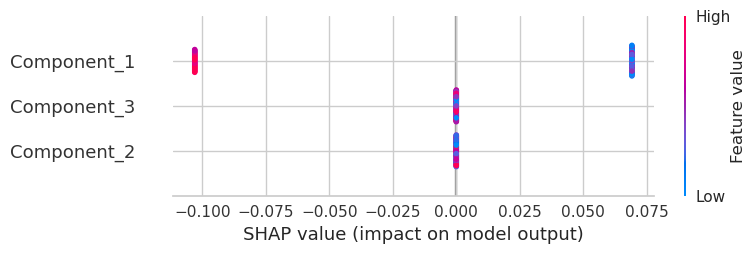

In [26]:
interpret_model(tuned_rf_pca, plot='summary')

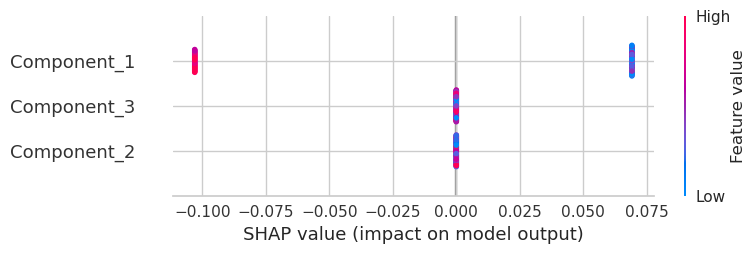

In [27]:
interpret_model(tuned_rf_pca, plot='summary', observation=20)

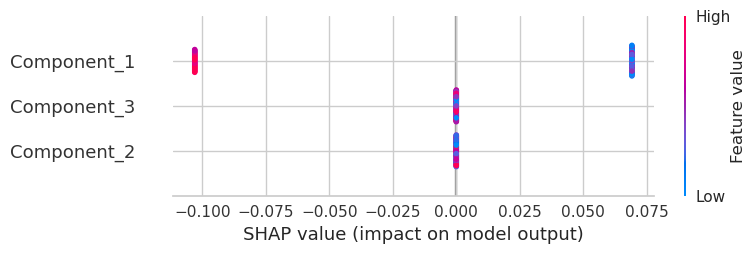

In [28]:
interpret_model(tuned_rf_pca, plot='summary')

# 4. Test Model

In [29]:
predict_model(tuned_best_model_pca, df.tail())

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,Label,Score
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,0,0.6220
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,0,0.5008
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,0,0.8801
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,0,0.8139
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0,1,0.7483
